## Viewing original dataset

In [190]:
import datasets
import json
from processor import Log
import os
import json
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
data_path = '../data'
logs_dir = 'logs/'

In [9]:
def load_logs(log_repository, data_path):

    filepath = os.path.join(data_path, log_repository)
    print("Loading logs from {}".format(filepath))

    missing_counter = 0
    file_count = 0
    for _, _, files in os.walk(filepath):
        file_count += len(files)
    logs = []
    for root, dirs, files in os.walk(filepath):
        for file in files:
            if file.endswith(".json"):
                with open(os.path.join(root, file), 'r') as logfile:
                    log = Log(json.load(logfile))
                    if log.complete:
                        logs.append(log)
                    else:
                        missing_counter += 1

    print("Complete. Loaded {} completed game logs.".format(len(logs)))
    return logs


In [12]:
logs = load_logs(logs_dir, data_path)

Loading logs from ../data/logs/
Complete. Loaded 2505 completed game logs.


## Count theme frequency

In [141]:
from collections import Counter

In [223]:
themes = []
for log in logs:
    thisgame = []
    for r in log.rounds:
        thisgame.append(set([r.split('/')[0] for p in list(r.images.values()) for r in p]))
    thisgame = list(set([e for x in thisgame for e in list(x)]))
    themes.append(thisgame)
themes = [t for game in themes for t in game]


tally = dict(Counter(themes))
tally = [(k,tally[k]) for k in tally.keys()]
tally = reversed(sorted(tally, key=lambda x : x[1]))
tally = dict(tally)

<Figure size 1000x500 with 0 Axes>

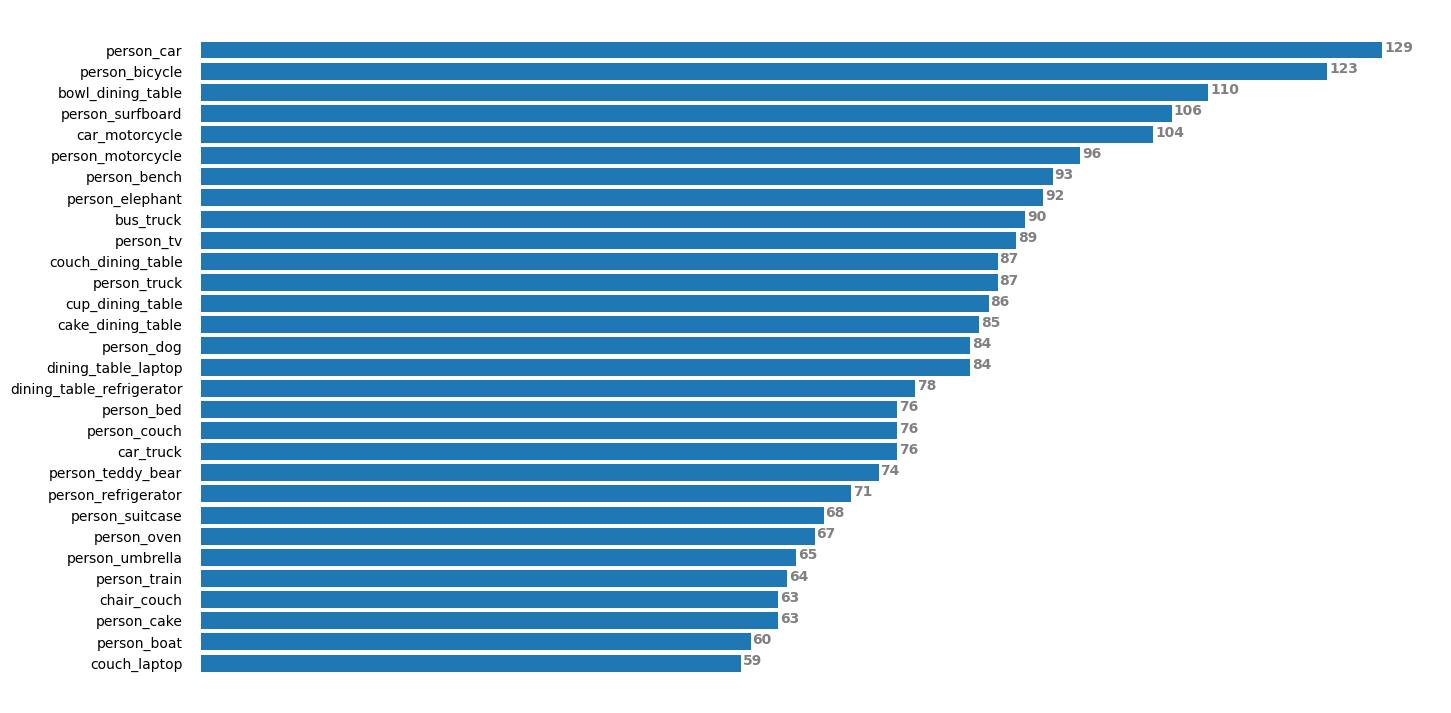

In [232]:
fig = plt.figure(figsize = (10, 5))
themes = list(tally.keys())
freqs = list(tally.values())
fig, ax = plt.subplots(figsize =(16, 9))
ax.barh(themes, freqs)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Show top values
ax.invert_yaxis()
ax.get_xaxis().set_visible(False)

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')

In [233]:
themes

['person_car',
 'person_bicycle',
 'bowl_dining_table',
 'person_surfboard',
 'car_motorcycle',
 'person_motorcycle',
 'person_bench',
 'person_elephant',
 'bus_truck',
 'person_tv',
 'couch_dining_table',
 'person_truck',
 'cup_dining_table',
 'cake_dining_table',
 'person_dog',
 'dining_table_laptop',
 'dining_table_refrigerator',
 'person_bed',
 'person_couch',
 'car_truck',
 'person_teddy_bear',
 'person_refrigerator',
 'person_suitcase',
 'person_oven',
 'person_umbrella',
 'person_train',
 'chair_couch',
 'person_cake',
 'person_boat',
 'couch_laptop']

## Count highlighted images

In [254]:
coincide = {3:0,4:0,5:0,6:0}
for game in logs:
    thisgame = []
    for r in game.rounds:
        Ah = [i for i, x in enumerate(r.highlighted['A']) if x]
        Bh = [i for i, x in enumerate(r.highlighted['B']) if x]
        thisgame.append(len(set(Ah + Bh)))
    for n in coincide.keys():
        coincide[n] += thisgame.count(n)
coincide

{3: 516, 4: 5522, 5: 5630, 6: 857}

## Count text messages

In [276]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [370]:
lens = {n : [] for n in range(5)}
for game in logs:
    this_theme = game2theme(game)
    for i, r in enumerate(game.rounds):
#         num_words = []
        num_msgs = 0
        for m in r.messages:
            if m.type == 'text':
#                 num_words.append(len(m.text.split(' ')))
                num_msgs += 1
#         lens[i] += num_words
        lens[i].append(num_msgs)
len(lens)

5

In [371]:
for i in range(5):
    mu, std = np.mean(lens[i]), np.std(lens[i])
    print(mu, std)

14.77684630738523 5.043375017901104
13.27065868263473 4.431627097107092
12.558882235528943 4.130484734244171
12.191217564870259 4.016801380192333
12.850698602794411 4.5867187110079275


In [372]:
newlens = lens[0] + lens[1] + lens[2] + lens[3] + lens[4]
mu, std = np.mean(newlens), np.std(newlens)
print(mu, std)

13.129660678642715 4.545897503947701


## Viewing dialogue segmentations

In [1]:
from datasets import load_dataset
import pandas as pd
import pickle
import sys
from processor import Log

In [2]:
!python dialogue_segmentation.py

In [3]:
test_clean = pd.read_pickle('../data/test_sections.pickle')

In [4]:
test_clean

[(2207,
  [{'gameid': 2207,
    'roundnr': 3,
    'segments': [(761, 'Do you have red bike guy again?'),
     (842, 'no'),
     (761, 'Do you have the big guy in motion again?'),
     (842, 'police man '),
     (761, 'no'),
     (842, 'no'),
     (842, 'yes sorry I do'),
     (842, 'parked orange bike'),
     (761, 'Ok thanks no worries at all'),
     (761, 'yes'),
     (761, 'ready to fly')],
    'image_set': {842: ['car_motorcycle/COCO_train2014_000000215201.jpg',
      'car_motorcycle/COCO_train2014_000000293647.jpg',
      'car_motorcycle/COCO_train2014_000000345207.jpg',
      'car_motorcycle/COCO_train2014_000000477807.jpg',
      'car_motorcycle/COCO_train2014_000000494833.jpg',
      'car_motorcycle/COCO_train2014_000000256560.jpg'],
     761: ['car_motorcycle/COCO_train2014_000000480807.jpg',
      'car_motorcycle/COCO_train2014_000000345207.jpg',
      'car_motorcycle/COCO_train2014_000000127400.jpg',
      'car_motorcycle/COCO_train2014_000000494833.jpg',
      'car_motorcyc

In [95]:
curr = tc_df[1][0] # list, len=10
curr = curr[9] # dict, keys=['agent_id', 'segments', 'image_set', 'clip_scores']
curr['segments']

[(782, 'Do you have a man on a motorcycle next to a red sports car?'),
 (980, 'do you have a motorcycle with a man on it at the gas station?'),
 (980, 'yes I do'),
 (782, 'No I dont'),
 (980, 'do you have a red motorcycle with a cup in front of it'),
 (782, 'Yes I do.'),
 (980, 'I have no more questions do you?'),
 (782,
  'Do you have a man on a motorcycle that has its front tire on a white line?'),
 (980, 'no i do not')]

## Image Features

In [30]:
img_feats = pd.read_pickle('data/image_feats.pickle')

FileNotFoundError: [Errno 2] No such file or directory: 'data/image_feats.pickle'

In [33]:
key0 = list(img_feats.keys())[0]
img_feats[key0].shape

torch.Size([512, 16, 16])

# Log files

In [5]:
import os
import json

In [6]:
def load_logs(log_repository, data_path):

    filepath = os.path.join(data_path, log_repository)
    print("Loading logs from {}...".format(filepath))

    missing_counter = 0
    file_count = 0
    for _, _, files in os.walk(filepath):
        file_count += len(files)
    print("{} files found.".format(file_count))
    logs = []
    for root, dirs, files in os.walk(filepath):
        for file in files:
            if file.endswith(".json"):
                with open(os.path.join(root, file), 'r') as logfile:
                    log = Log(json.load(logfile))
                    if log.complete:
                        logs.append(log)

    print("DONE. Loaded {} completed game logs.".format(len(logs)))
    return logs

In [19]:
data_path = "../data"
logs = load_logs("logs", data_path)

Loading logs from ../data/logs...
2502 files found.
DONE. Loaded 2502 completed game logs.


In [47]:
def print_round(r):
    
    def print_images(r, player, img_status):
        print(f'\t{player}:')
        for i, image in enumerate(r.images[player]):
            common = ' (Common)' if image in r.common else '         '
            marked = f' (Marked as {img_status[player][i]})' if r.highlighted[player][i] else ''
            print('\t\t' + image + common + marked)
    
    print("total score: {}".format(r.total_score))        
    print("player scores: A - {}, B - {}".format(r.scores["A"], r.scores["B"]))
    
    print('\nmessages:')
    msg_list = []
    img_status = {'A':[0,0,0,0,0,0], 'B':[0,0,0,0,0,0]}
    for i, m in enumerate(r.messages):
        if m.type == "text":
            msg_list.append({'speaker': m.speaker, 'text': m.text})
        if m.type == "selection":
            speaker = m.speaker
            img = m.text.split()[2]
            label = "common" if m.text.split()[1] == "<com>" else "different"
            correct = 'correctly' if (img in r.common and label == 'common') or (img not in r.common and label == 'different') else 'incorrectly'
            img_status[speaker][r.images[speaker].index(img)] = label
            if msg_list != []:
                msg_list[-1]['text'] += f' ({speaker} {correct} marked {img} as {label})'

    for d in msg_list:
        speaker = d['speaker']
        text = d['text']
        print(f'\t{speaker}: {text}')

    print('images:')
    print_images(r, 'A', img_status)
    print_images(r, 'B', img_status)

def find_game(game_id, logs):
    for game in logs:
        if game.game_id == game_id:
            return game
    
thisGame = find_game(1745, logs) # Log, containing 5 rounds
thisRound = thisGame.rounds[0]
print(thisGame.game_id)
print(thisRound.round_nr)
print_round(thisRound)


1745
2
total score: 6
player scores: A - 3, B - 3

messages:
	B: do you have a guy on a red bmw with cowl?
	A: No (B correctly marked car_motorcycle/COCO_train2014_000000127400.jpg as different)
	A: Do you have a 5-wheel black cycle?
	B: no (A correctly marked car_motorcycle/COCO_train2014_000000024608.jpg as different)
	A: Do you have a motorcycle in a parking space?
	B: do you have a cop at speed on a cycle?  white shirt
	B: yes in parking space
	A: Yes to the cop (A correctly marked car_motorcycle/COCO_train2014_000000256560.jpg as common) (B correctly marked car_motorcycle/COCO_train2014_000000215201.jpg as common) (A correctly marked car_motorcycle/COCO_train2014_000000215201.jpg as common)
	B: guy in black bent over looking in saddle bag?
	A: No (B correctly marked car_motorcycle/COCO_train2014_000000144597.jpg as different)
images:
	A:
		car_motorcycle/COCO_train2014_000000024608.jpg          (Marked as different)
		car_motorcycle/COCO_train2014_000000215201.jpg (Common) (Marked

In [24]:
thisRound.images['A'].index('person_truck/COCO_train2014_000000227003.jpg')

1

In [3]:
from transformers import DebertaTokenizer

In [9]:
def round2dict(r, tokenizer, player):
    input_ids = []
    token_type_ids = []
    labels = []

    images = r.images[player]
    # 0 = undecided, 1 = common, 2 = different
    image_status = [[0] for _ in images]
    
    for i, m in enumerate(r.messages):
        if m.type == "text":
            tokenized_msg =  tokenizer(m.text,padding=False,truncation=True)['input_ids']
            input_ids.append(tokenized_msg)
            token_type_id = 0 if m.speaker == player else 1
            token_type_ids.append([token_type_id for _ in tokenized_msg])
            labels.append([x * len(tokenized_msg) for x in image_status])

        if m.type == "selection" and m.speaker == player:
            img = m.text.split()[2]
            img_index = images.index(img)
            label = 1 if m.text.split()[1] == "<com>" else 2
            image_status[img_index] = [label]

    return {'input_ids':input_ids, 'token_type_ids':token_type_ids, 'labels':labels}

In [10]:
tokenizer = DebertaTokenizer.from_pretrained("microsoft/deberta-base")

In [13]:
thisGame = logs[0] # Log, containing 5 rounds
thisRound = logs[0].rounds[0]

result = round2dict(thisRound, tokenizer, 'A')

result

{'input_ids': [[1,
   8275,
   47,
   33,
   132,
   604,
   6,
   112,
   1826,
   10,
   912,
   1203,
   116,
   2],
  [1, 2362, 9565, 47, 33, 99, 1326, 7, 28, 10, 921, 145, 21100, 2],
  [1, 368, 26998, 19, 10, 313, 2934, 639, 24, 2],
  [1, 10932, 6, 1437, 38, 109, 4, 1832, 47, 33, 1159, 816, 4191, 2],
  [1, 10932, 11, 2272, 8, 5718, 17753, 2],
  [1, 10932, 2],
  [1,
   8275,
   47,
   33,
   132,
   604,
   2934,
   11,
   760,
   9,
   10,
   2484,
   6,
   112,
   1826,
   10,
   912,
   1203,
   116,
   2],
  [1,
   2362,
   53,
   109,
   1717,
   33,
   10,
   693,
   19,
   10,
   909,
   16676,
   11,
   760,
   9,
   10,
   793,
   8517,
   2],
  [1, 3084, 38, 109, 45, 33, 14, 65, 2],
  [1, 11913, 97, 1142, 116, 2],
  [1, 2362, 939, 300, 127, 155, 2446, 2],
  [1, 13987, 47, 6, 162, 350, 2]],
 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Print transcript

In [135]:
from load_logs import load_logs
from processor import Log


def print_transcript(log):
    print("Game ID: {}".format(log.game_id))
    print("Domain ID: {}".format(log.domain_id))
    print("Image set main objects: '{}' and '{}'".format(
        log.domains[0], log.domains[1]))
    print("Participant IDs: {} and {}".format(
        log.agent_ids[0], log.agent_ids[1]))
    print("Start Time: {}".format(log.start_time))
    print("Duration: {}".format(log.duration))
    print("Total Score: {}".format(log.total_score))
    print(
        "Player scores: A - {}, B - {}".format(log.scores["A"], log.scores["B"]))
    print("Transcript:\n")

    for round_data in log.rounds:
        print("Round {}".format(round_data.round_nr))
        for message in round_data.messages:
            if message.type == "text":
                print("[{}] {}: {}".format(Log.format_time(
                    message.timestamp), message.speaker, message.text))

            if message.type == "selection":
                label = "common" if message.text.split()[
                    1] == "<com>" else "different"
                print("[{}] {} marks image {} as {}".format(Log.format_time(
                    message.timestamp), message.speaker, Log.strip_image_id(message.text.split()[2]), label))

        print("\nDuration: {}".format(round_data.duration))
        print("Total Score: {}".format(round_data.total_score))
        print(
            "Player scores: A - {}, B - {}".format(round_data.scores["A"], round_data.scores["B"]))
        print("Number of messages: {}\n".format(round_data.num_messages))

thisGame = logs[0]  # Log, containing 5 rounds
print_transcript(thisGame)

Game ID: 454
Domain ID: 28
Image set main objects: 'person' and 'truck'
Participant IDs: 115 and 524
Start Time: 2018-04-25T04:26:01.775437
Duration: 0:20:18.146128
Total Score: 30
Player scores: A - 15, B - 15
Transcript:

Round 2
[00:00] A: Do you have 2 men, 1 holding a stop sign?
[00:25] B: no fo you have what looks to be a road being paved
[00:41] B: or sprayed with a man standing behind it
[01:05] B marks image 418229 as different
[01:11] A: yes,  I do. Do you have kids playing soccer
[01:14] A marks image 418229 as common
[01:25] B: yes in green and yellow socks
[01:30] B marks image 418229 as common
[01:32] A: yes
[01:33] B marks image 258505 as common
[01:39] A marks image 258505 as common
[01:59] A: Do you have 2 men standing in front of a truck, 1 holding a stop sign?
[02:19] B: no but do u have a woman with a black umbrella in front of a old pickup
[02:26] B marks image 237372 as different
[02:38] A: No I do not have that one
[02:40] A marks image 227003 as different
[03:05

## Analysis splits

In [261]:
import json
import os
import glob
import random
from processor import Log
from os import walk

In [256]:
data_path = '../data/logs'
files = glob.glob(f'{data_path}/*.json')

In [257]:
def game2theme(g):
    return '_'.join(g.domains)

def game2imgs(g):
    return list(walk('../images/' + game2theme(g)))[0][2]

def file2game(f):
    with open(f) as file:
        log = Log(json.load(file))
    return log

def game2dist(g):
    return [str({player: sorted([game2imgs(g).index(img.split('/')[1])+1 for img in r.images[player]]) for player in ('A','B')}) for r in g.rounds]    

In [258]:
g = file2game(files[2])
print(game2theme(g))
game2dist(g)

person_bicycle


["{'A': [2, 4, 7, 9, 10, 11], 'B': [2, 4, 5, 6, 9, 10]}",
 "{'A': [3, 4, 6, 10, 11, 12], 'B': [1, 2, 3, 6, 10, 11]}",
 "{'A': [1, 2, 4, 5, 7, 8], 'B': [4, 5, 7, 8, 9, 12]}",
 "{'A': [1, 6, 7, 8, 9, 12], 'B': [2, 3, 5, 9, 11, 12]}",
 "{'A': [1, 3, 5, 7, 8, 11], 'B': [1, 3, 6, 8, 10, 12]}"]

In [16]:
g = file2game(files[4])
print(game2theme(g))
game2dist(g)

person_bicycle


["{'A': [3, 4, 6, 10, 11, 12], 'B': [1, 2, 3, 6, 10, 11]}",
 "{'A': [1, 6, 7, 8, 9, 12], 'B': [2, 3, 5, 9, 11, 12]}",
 "{'A': [1, 3, 5, 7, 8, 11], 'B': [1, 3, 6, 8, 10, 12]}",
 "{'A': [1, 2, 4, 5, 7, 8], 'B': [4, 5, 7, 8, 9, 12]}",
 "{'A': [2, 4, 7, 9, 10, 11], 'B': [2, 4, 5, 6, 9, 10]}"]

In [9]:
test_cls = {'person_refrigerator', 'chair_couch', 'car_motorcycle',
            'cake_dining_table', 'cup_dining_table', 'bus_truck'}
data_split = {'train': [], 'valid': [], 'test': []}
val_mapping = dict()

In [17]:
for f in files:
    g = file2game(f)
    if game2theme(g) in test_cls:
        data_split['test'].append({g.game_id:[0,1,2,3,4]})
    else:
        if game2theme(g) not in val_mapping:
            val_mapping[game2theme(g)] = game2dist(g)[0]
        val_round = game2dist(g).index(val_mapping[game2theme(g)])
        data_split['valid'].append({g.game_id:[val_round]})
        data_split['train'].append({g.game_id:[i for i in range(5) if i != val_round]})

In [20]:
val_mapping

{'person_truck': "{'A': [2, 3, 5, 7, 8, 10], 'B': [2, 3, 6, 7, 9, 10]}",
 'person_surfboard': "{'A': [1, 2, 4, 7, 8, 10], 'B': [1, 2, 3, 4, 8, 11]}",
 'person_bicycle': "{'A': [2, 4, 7, 9, 10, 11], 'B': [2, 4, 5, 6, 9, 10]}",
 'car_truck': "{'A': [4, 5, 7, 8, 10, 11], 'B': [3, 4, 5, 6, 9, 12]}",
 'couch_laptop': "{'A': [1, 3, 4, 6, 9, 11], 'B': [2, 3, 4, 6, 7, 9]}",
 'person_train': "{'A': [2, 5, 7, 8, 9, 12], 'B': [3, 5, 6, 7, 8, 9]}",
 'person_car': "{'A': [3, 4, 7, 9, 10, 11], 'B': [2, 4, 5, 6, 7, 11]}",
 'person_elephant': "{'A': [4, 7, 8, 9, 11, 12], 'B': [1, 5, 7, 9, 11, 12]}",
 'couch_dining_table': "{'A': [3, 4, 6, 8, 11, 12], 'B': [1, 4, 8, 9, 11, 12]}",
 'person_motorcycle': "{'A': [3, 5, 7, 8, 9, 12], 'B': [1, 3, 8, 9, 10, 11]}",
 'bowl_dining_table': "{'A': [1, 3, 6, 7, 8, 11], 'B': [1, 6, 7, 10, 11, 12]}",
 'person_bench': "{'A': [1, 4, 5, 6, 9, 12], 'B': [1, 3, 4, 6, 9, 10]}",
 'person_teddy_bear': "{'A': [3, 5, 7, 8, 9, 12], 'B': [1, 2, 3, 4, 5, 12]}",
 'dining_table_ref

In [21]:
with open("../data/analysis_splits.json", 'w') as f:
    json.dump(data_split, f)

## Counting image dists per theme

In [ ]:
from collections import defaultdict

In [265]:
theme_collector = defaultdict(set)
for f in files:
    g = file2game(f)
    for dist in game2dist(g):
        theme_collector[game2theme(g)].add(dist)

In [268]:
for k in theme_collector:
    print(len(theme_collector[k]))

5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [269]:
print(theme_collector['dining_table_refrigerator'])

{"{'A': [1, 5, 6, 8, 10, 11], 'B': [2, 4, 6, 9, 10, 12]}", "{'A': [1, 3, 7, 9, 10, 12], 'B': [1, 2, 7, 8, 9, 12]}", "{'A': [2, 3, 6, 7, 11, 12], 'B': [1, 2, 3, 4, 6, 7]}", "{'A': [4, 5, 8, 9, 11, 12], 'B': [1, 5, 7, 8, 9, 10]}", "{'A': [2, 3, 4, 5, 8, 11], 'B': [3, 4, 5, 6, 10, 11]}"}
